<a href="https://colab.research.google.com/github/victorncg/financas_quantitativas/blob/main/Dividend_Yield.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://tradingcomdados.com/images/logotipo/logotipo-trading-com-dados.svg" width="500" align="left"/>

# **Dividend Yield**

O Dividend Yield (DY) pode ser entendido como o retorno em dividendos que uma empresa paga aos seus acionistas.

Pode ser calculado dividindo a soma dos dividendos pagos por ação pelo preço do papel na data de referência. Portanto, o DY muda conforme a cotação das ações também muda.

Para mais informações:

https://www.modalmais.com.br/blog/dividend-yield/

## 1. Instalação e importação de bibliotecas

In [ ]:
!pip install yfinance

In [2]:
import yfinance as yf

## 2. Importação dos dados

In [17]:
papel = yf.Ticker('WEGE3.SA')

Vamos obter os dados históricos de WEGE3 para o período de 1 ano, de 01/06/2021 até 01/06/2022

In [20]:
dados = papel.history(start = '2021-06-01', end = '2022-06-01')

Desses dados históricos, vamos trazer apenas a informação de dividendos

In [21]:
dados.Dividends

Date
2021-06-01    0.0
2021-06-02    0.0
2021-06-04    0.0
2021-06-07    0.0
2021-06-08    0.0
             ... 
2022-05-25    0.0
2022-05-26    0.0
2022-05-27    0.0
2022-05-30    0.0
2022-05-31    0.0
Name: Dividends, Length: 249, dtype: float64

In [22]:
dividendos = dados.Dividends

## 3. Cálculo do valor pago em dividendos

In [23]:
dividendos[dividendos!=0]

Date
2021-06-28    0.020529
2021-08-02    0.158175
2021-09-27    0.020705
2021-12-20    0.032000
2022-02-21    0.205203
2022-03-28    0.036764
Name: Dividends, dtype: float64

Dividendos pagos por Weg nesse período

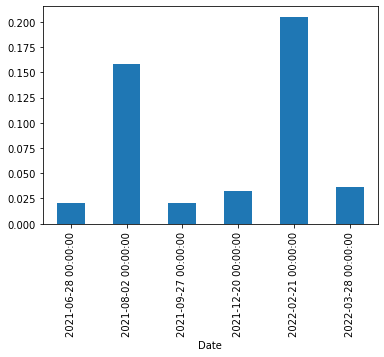

In [37]:
dividendos[dividendos!=0].plot.bar();

In [39]:
# Passando essa informação em um outro dataframe para melhorar a visualização
df = dividendos[dividendos!=0]

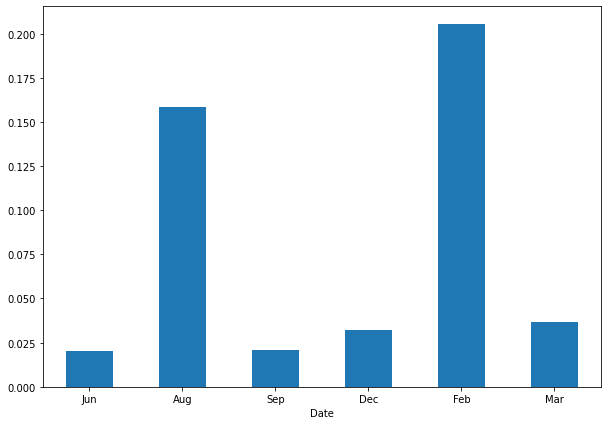

In [46]:
def formata_grafico(label):
    meses = label.month_name()[:3]
    if meses == 'Jan':
        meses += f'\n{label.year}'
    return meses

# Fazemos rot = 0 para rotacionar o nome dos meses e ficar na horizontal
ax = df.plot(kind='bar', figsize=(10, 7), rot=0);
ax.set_xticklabels(map(formata_grafico, df.index));

Calculando a soma dos dividendos pagos

In [24]:
sum(dividendos[dividendos!=0])

0.473376

In [33]:
soma_dividendos = sum(dividendos[dividendos!=0])

## 4. Cálculo do Dividend Yield

In [26]:
preco_final22 = yf.download('WEGE3.SA',start = '2022-06-01')['Adj Close'][-1]

[*********************100%***********************]  1 of 1 completed


In [27]:
preco_final22

25.399999618530273

In [28]:
dy_weg = soma_dividendos/preco_final22

In [29]:
round(dy_weg*100,2)

1.86

Comparar com o valor exibido no **Status Invest**:

https://statusinvest.com.br/acoes/wege3

Obs: o valor do DY pode variar ligeiramente dependendo do dia e do momento exatos que você extrai a cotação do papel. Para que o DY tenha o mesmo valor, você precisa trabalhar com a mesma cotação que aparece no Status Invest.

# **continue aprendendo!**

Gostou desta análise?

Do dia 21 a 24 de Junho faremos um mini-curso **gratuito** mostrando o caminho completo para entrar na área das finanças quantitativas.

Vamos realizar um estudo de caso da área quant, realizando desde a obtenção e análise dos dados, até a concepção, backtesting e implementação de uma estratégia de trading. Tudo isso programando ao vivo em Python.

Além disso, receberemos a participação de convidados do mercado para dar dicas de carreira!

E o melhor, tudo isso de graça!

Garanta sua vaga!
https://bit.ly/jornadaquant

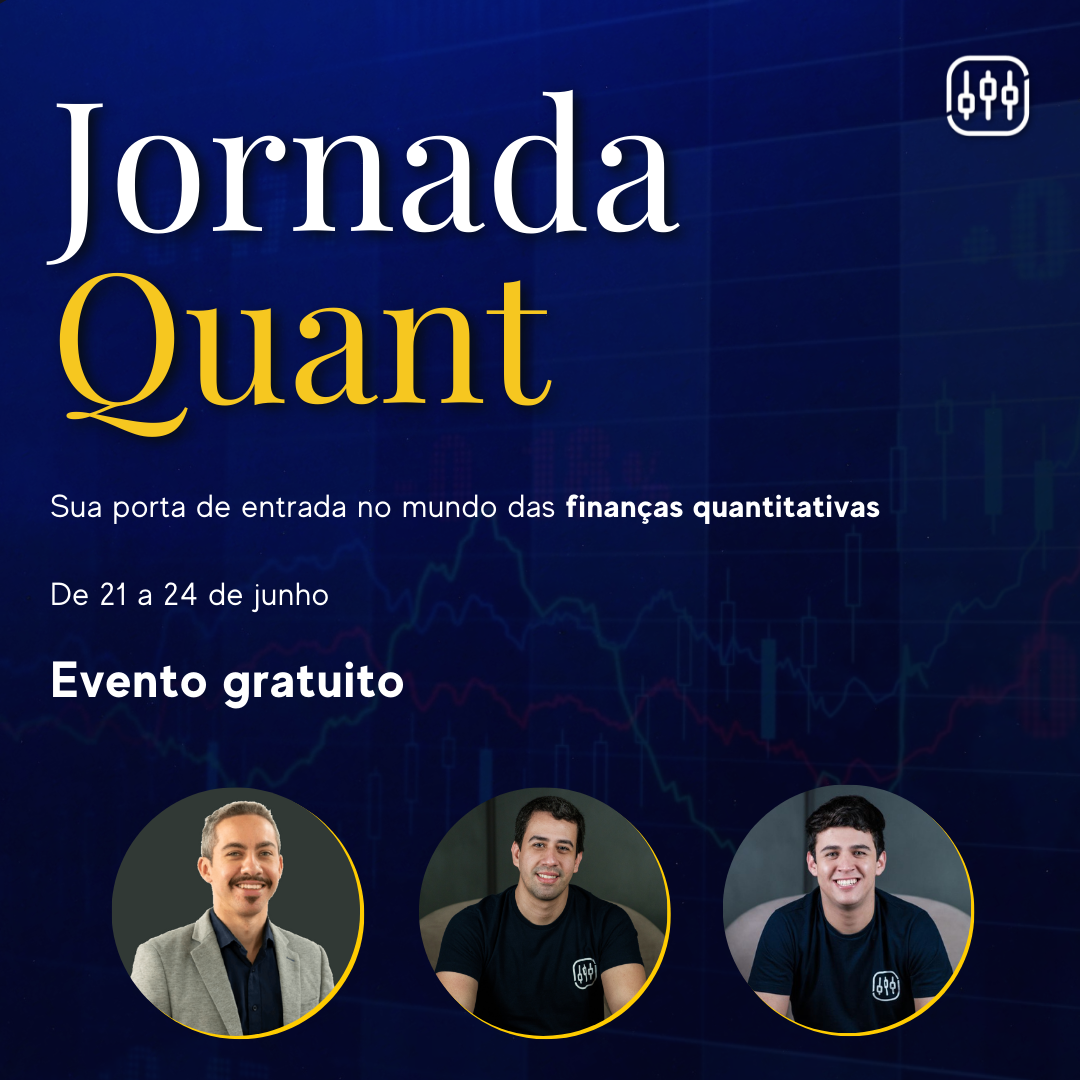

In [61]:
from IPython.display import Image
Image("jornada.png",width = 500, height = 500)



## **Se você chegou até aqui, parabéns!!**

Aprendemos a obter os dados dos dividendos para uma ação, depois somar esses dividendos ao longo de um período de um ano, e por fim, dividir a soma desses dividendos pelo preço atual da ação.

Agora vamos dar um passo adiante!

Vamos utilizar esse conhecimento obtido para fazer o cálculo do Dividend Yield ao longo de uma janela maior de tempo.

Ou seja, vamos calcular a soma dos dividendos pagos ao longo de janelas de 365 dias e depois dividir o resultado pelas cotações.

Vamos juntos?

Vamos começar obtendo os dados de WEGE3 desde o seu IPO

In [107]:
dados_weg = papel.history(start = '2000-01-01', end = '2022-06-01')

In [108]:
dados_weg.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2000-01-03,0.125042,0.126138,0.125042,0.125042,378560,0.0,0.0
2000-01-04,0.121751,0.121751,0.120654,0.120654,47320,0.0,0.0
2000-01-05,0.120654,0.120654,0.120654,0.120654,0,0.0,0.0
2000-01-06,0.109685,0.109685,0.109685,0.109685,250120,0.0,0.0
2000-01-07,0.110782,0.110782,0.109685,0.109685,135200,0.0,0.0


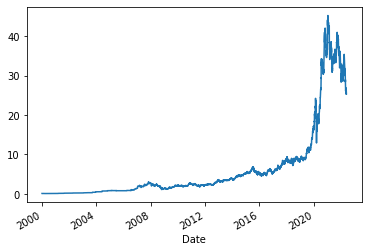

In [109]:
# para ter uma ideia, este foi o comportamento do papel desde que começou a ser negociado
dados_weg.Close.plot();

Agora, vamos criar uma coluna nova que vai conter o resultado da soma dos dividendos pagos por Weg em janelas de 365 dias.

In [110]:
dados_weg['soma_dividendos'] = dados_weg.Dividends.rolling(365).sum()

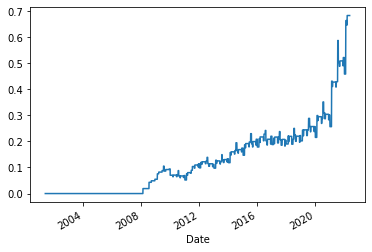

In [111]:
# Esse foi o resultado dos dividendos pagos por Weg por ação em janelas de 1 ano
dados_weg.soma_dividendos.plot();

Vamos criar um novo dataframe removendo os NaNs gerados no cálculo anterior

In [112]:
dados_weg_final = dados_weg.dropna()

Por fim, vamos criar uma nova coluna que vai pegar o resultado da coluna anterior de soma dos dividendos e dividir pelo preço do papel

In [113]:
dados_weg_final['dividend_yield'] = dados_weg_final['soma_dividendos']/dados_weg_final['Close']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


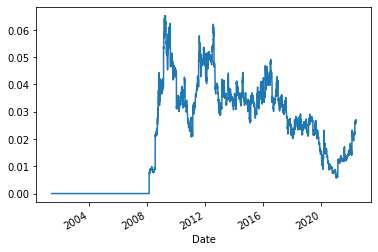

In [114]:
dados_weg_final['dividend_yield'].plot();

Vamos plotar os últimos 10 anos

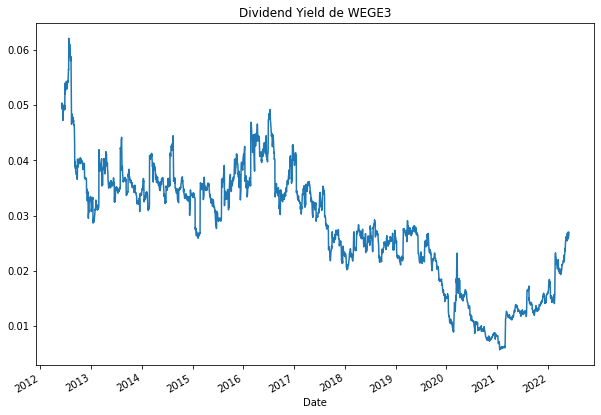

In [119]:
dados_weg_final.dividend_yield[dados_weg_final.index>'2012-06-01'].plot(figsize = (10,7), title='Dividend Yield de WEGE3');

# **Se você concluiu o estudo, parabéns!!!**

Agora você consegue não só calcular o DY para datas estáticas, como também para janelas de tempo!

Que tal repetir essa análise para outras ações que você tem na sua carteira?

E se quiser aprender mais técnicas quantitativas de análise para contribuir nos seus investimentos, inscreva-se no nosso curso gratuito! De 21 a 24 de junho vamos realizar a Jornada Quant, um evento ao vivo e online com 4 encontros onde vamos apresentar o caminho para entrar no mundo das finanças quantitativas.

Inscreva-se já!
https://bit.ly/jornadaquant